# Resolvendo Problemas de Engenharia de Bioprocessos e Biotecnologia em *Python*
---


##Sistemas de Equações Lineares

Considerando o sistema:

\\
$S_1 =
\begin{cases}
a_{11} x_1 + a_{12} x_2 + \cdots + a_{1n} x_n = b_1 \\
a_{21}x_1 + a_{22} x_2 + \cdots + a_{2n} x_n = b_2 \\
\vdots \\
a_{m1}x_1 + a_{m2} x_2 + \cdots + a_{mn} x_n = b_m
\end{cases}$
(Sistema 1)

\\
É possível escrever as matrizes:

\\
$A_{m,n} =
 \begin{pmatrix}
  a_{11} & a_{12} & \cdots & a_{1n}  \\
  a_{21} & a_{22} & \cdots & a_{2n}  \\
  \vdots  & \vdots  & \ddots & \vdots\\
  a_{m1} & a_{m2} & \cdots & a_{mn}
 \end{pmatrix}$
 (Matriz 1)

\\
 $X_{n,1} =
 \begin{pmatrix}
  x_{1} \\
  x_{2} \\
  \vdots\\
  x_{n}
 \end{pmatrix}$
 (Matriz 2)

\\
 $B_{m,1} =
 \begin{pmatrix}
  b_{1} \\
  b_{2} \\
  \vdots\\
  b_{m}
 \end{pmatrix}$
 (Matriz 3)


\\
E a equação:

\\
$ A \cdot X = B $

$\begin{pmatrix}
  a_{11} & a_{12} & \cdots & a_{1n}  \\
  a_{21} & a_{22} & \cdots & a_{2n}  \\
  \vdots  & \vdots  & \ddots & \vdots\\
  a_{m1} & a_{m2} & \cdots & a_{mn}
 \end{pmatrix}$                        <!--- Matriz 1 / Matriz A -->
 $\cdot$
 $\begin{pmatrix}
  x_{1} \\
  x_{2} \\
  \vdots\\
  x_{n}
 \end{pmatrix}$                        <!--- Matriz 2 / Matriz X -->
 $=$
 $\begin{pmatrix}
  b_{1} \\
  b_{2} \\
  \vdots\\
  b_{m}
 \end{pmatrix}$                         <!--- Matriz 3 / Matriz B -->
 (Equação 1)

In [ ]:
##### Exemplo do uso da biblioteca NumPy para resolução de sistemas de equações não lineares #####

import numpy as np
from scipy.optimize import fsolve

def f (x):
  x1, x2 = x
  return [x1 * np.cos (x2) - 4,
          x2 * x1 - x2 - 5]
raiz = fsolve (f, [1, 1])
print(raiz)
np.isclose (f (raiz), [0.0, 0.0])


[6.50409711 0.90841421]


array([ True,  True])

---
# Exemplo de Aplicação 1
\\
Considerando um sistema com três destiladores conectados, sem reciclo, operando, como na Figura 1 abaixo, para separar uma mistura de xileno, estireno, tolueno e benzeno.

\\

<center>

Figura 1: Sistema de três destiladores, onde o primeiro recebe um fluxo externo e transfere sua fração de topo para um segundo destilador e sua fração de fundo para um terceiro, enquanto estes últimos geram, juntos, 4 fluxos de saída.

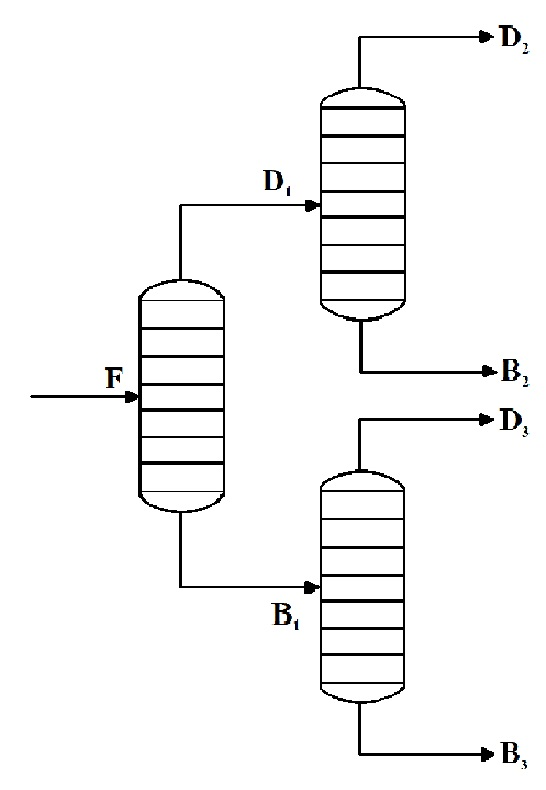

Fonte: KWONG, 2016.
</center>


\\
As concentrações de cada componente da mistura foram medidas na corrente de entrada e nas correntes de saída. Essas concentrações podem ser observadas na Tabela 1, abaixo.

\\
<center>
Tabela 1: Quantidade (%) de cada componente da mistura em cada corrente de entrada ou saída

 Corrente  | Xileno | Estireno | Tolueno | Benzeno
 ----------|:------:|:--------:|:-------:|:-------:
 $F$       | 15     | 25       | 40      | 20      
 $D_2$     | 7      | 4        | 54      | 35      
 $B_2$     | 18     | 24       | 42      | 16      
 $D_3$     | 15     | 10       | 54      | 21      
 $B_3$     | 24     | 65       | 10      | 1       

Fonte: KWONG, 2016.
</center>

\\
Para realizar o balanço de massa do sistema, é necessário considerar:
- Os componentes de índices:
  - $1$, Xileno
  - $2$, Estireno
  - $3$, Tolueno
  - $4$, Benzeno
- Os fluxos:
  - $F$ de entrada
  - $D_1$ de saída superior do destilador 1 e entrada do destilador 2
  - $B_1$ de saída inferior do destilador 1 e entrada do destilador 2
  - $D_2$ de saída superior do destilador 2
  - $B_2$ de saída inferior do destilador 2
  - $D_3$ de saída superior do destilador 3
  - $B_3$ de saída inferior do destilador 3
- As concentrações (%) de cada fluxo:
  - $z$ do fluxo F
  - $y_{ij}$ do fluxo $D_i$, componente $j$
  - $x_{ij}$ do fluxo $B_i$, componente $j$

\\
Com base nas considerações, é possível equacionar:
- A relação entre os fluxos:

$\begin{cases}
F = D_1 + B_1 \\
D_1 = D_2 + B_2 \\
B_1 = D_3 + B_3
\end{cases}$

- O balanço de massa global:

$\begin{cases}
D_2 y_{21} + B_2 x_{21} + D_3 y_{31} + B_3 x_{31} = F z_1 \\
D_2 y_{22} + B_2 x_{22} + D_3 y_{32} + B_3 x_{32} = F z_2 \\
D_2 y_{23} + B_2 x_{23} + D_3 y_{33} + B_3 x_{33} = F z_3 \\
D_2 y_{24} + B_2 x_{24} + D_3 y_{34} + B_3 x_{34} = F z_1
\end{cases}$

- A equação matricial do balanço de massa global:

$\begin{pmatrix}
y_{21} & x_{21} & y_{31} & x_{31} \\
y_{22} & x_{22} & y_{32} & x_{32} \\
y_{23} & x_{23} & y_{33} & x_{33} \\
y_{24} & x_{24} & y_{34} & x_{34}
\end{pmatrix}$
$\cdot$
$\begin{pmatrix}
D_2 \\
B_2 \\
D_3 \\
B_3
\end{pmatrix}$
$=$
$\begin{pmatrix}
F z_1 \\
F z_2 \\
F z_3 \\
F z_4
\end{pmatrix}$
(Equação 2)

- O balanço de massa para a Coluna 1:

$\begin{cases}
D_1 y_{11} + B_1 x_{11} = F z_1 \\
D_1 y_{12} + B_1 x_{12} = F z_2 \\
D_1 y_{13} + B_1 x_{13} = F z_3 \\
D_1 y_{14} + B_1 x_{14} = F z_4
\end{cases}$

- O balanço de massa para a Coluna 2:

$\begin{cases}
D_2 y_{21} + B_2 x_{21} = D_1 y_{11} \\
D_2 y_{22} + B_2 x_{22} = D_1 y_{12} \\
D_2 y_{23} + B_2 x_{23} = D_1 y_{13} \\
D_2 y_{24} + B_2 x_{24} = D_1 y_{14}
\end{cases}$

- O balanço de massa para a Coluna 3:

$\begin{cases}
D_3 y_{31} + B_3 x_{31} = B_1 x_{11} \\
D_3 y_{32} + B_3 x_{32} = B_1 x_{12} \\
D_3 y_{33} + B_3 x_{33} = B_1 x_{13} \\
D_3 y_{34} + B_3 x_{34} = B_1 x_{14}
\end{cases}$

\\
Com base em todos os sistemas acima, é possível determinar as concentrações de saída ($x$ e $y$); as massas de entrada ($Fz$); e os fluxos de saída do sistema ($D$ e $B$).

In [ ]:
############# EXEMPLO DO LIVRO DE KWONG 2016 #############
import numpy as np

#--------------------------------------------------------#
#|              Fluxo de entrada (mol/min)              |#
#--------------------------------------------------------#
F = 70

#--------------------------------------------------------#
#|       Concentracoes da corrente de entrada (%)       |#
#--------------------------------------------------------#
z1 = 15
z2 = 25
z3 = 40
z4 = 20

#--------------------------------------------------------#
#| Concentracoes das correntes de saida da Coluna 2 (%) |#
#--------------------------------------------------------#
# Superior #
y21 = 7
y22 = 4
y23 = 54
y24 = 35
# Inferior #
x21 = 18
x22 = 24
x23 = 42
x24 = 16

#--------------------------------------------------------#
#| Concentracoes das correntes de saida da Coluna 3 (%) |#
#--------------------------------------------------------#
# Superior #
y31 = 15
y32 = 10
y33 = 54
y34 = 21
# Inferior #
x31 = 24
x32 = 65
x33 = 10
x34 = 1

#--------------------------------------------------------#
#|                      Incognitas                      |#
#--------------------------------------------------------#
# x11, x12, x13, x14
# y11, y12, y13, y14
# B1, B2, B3
# D1, D2, D3

#--------------------------------------------------------#
#|              Balanco de massa global                 |#
#--------------------------------------------------------#
# Concentracoes das correntes de saida das Colunas 2 e 3 #
A = np.array([[ y21, x21, y31, x31],
              [ y22, x22, y32, x32],
              [ y23, x23, y33, x33],
              [ y24, x24, y34, x34]])
# Massas das correntes de entrada da Coluna 1 #
B = np.array([[F*z1],
              [F*z2],
              [F*z3],
              [F*z4]])
# Resolucao do sistema #
X = np.linalg.solve(A, B)
D2 = X[0][0]
B2 = X[1][0]
D3 = X[2][0]
B3 = X[3][0]

#--------------------------------------------------------#
#|             Balanco de massa da Coluna 2             |#
#--------------------------------------------------------#
D1 = D2 + B2

D1y11 = D2 * y21 + B2 * x21
D1y12 = D2 * y22 + B2 * x22
D1y13 = D2 * y23 + B2 * x23
D1y14 = D2 * y24 + B2 * x24

y11 = D1y11 / D1
y12 = D1y12 / D1
y13 = D1y13 / D1
y14 = D1y14 / D1

#--------------------------------------------------------#
#|             Balanco de massa da Coluna 3             |#
#--------------------------------------------------------#
B1 = D3 + B3

B1x11 = D3 * y31 + B3 * x31
B1x12 = D3 * y32 + B3 * x32
B1x13 = D3 * y33 + B3 * x33
B1x14 = D3 * y34 + B3 * x34

x11 = B1x11 / B1
x12 = B1x12 / B1
x13 = B1x13 / B1
x14 = B1x14 / B1

#--------------------------------------------------------#
#|                 Impressao da solucao                 |#
#--------------------------------------------------------#

def ImprimeFluxoEConcentracao (entradasaida, fluxo, conc1, conc2, conc3, conc4):
  print(f"{entradasaida}:")
  print("  Fluxo (mol/min) = ", "%.2f"%fluxo)
  print("      Concentrações (%):")
  print("      - Xileno   = ", "%.2f"%conc1)
  print("      - Estireno = ", "%.2f"%conc2)
  print("      - Tolueno  = ", "%.2f"%conc3)
  print("      - Benzeno  = ", "%.2f"%conc4)
  print("\n")

print("----------------------------------------------------")
print("--------------------  COLUNA 1  --------------------")
print("----------------------------------------------------")

ImprimeFluxoEConcentracao ("Entrada", F, z1, z2, z3, z4)


print("----------------------------------------------------")
print("--------------------  COLUNA 2  --------------------")
print("----------------------------------------------------")

ImprimeFluxoEConcentracao ("Entrada", D1, y11, y12, y13, y14)
ImprimeFluxoEConcentracao ("Saída superior", D2, y21, y22, y23, y24)
ImprimeFluxoEConcentracao ("Saída inferior", B2, x21, x22, x23, x24)


print("----------------------------------------------------")
print("--------------------  COLUNA 3  --------------------")
print("----------------------------------------------------")

ImprimeFluxoEConcentracao ("Entrada", B1, x11, x12, x13, x14)
ImprimeFluxoEConcentracao ("Saída superior", D3, y31, y32, y33, y34)
ImprimeFluxoEConcentracao ("Saída inferior", B3, x31, x32, x33, x34)



----------------------------------------------------
--------------------  COLUNA 1  --------------------
----------------------------------------------------
Entrada:
  Fluxo (mol/min) =  70.00
      Concentrações (%):
      - Xileno   =  15.00
      - Estireno =  25.00
      - Tolueno  =  40.00
      - Benzeno  =  20.00


----------------------------------------------------
--------------------  COLUNA 2  --------------------
----------------------------------------------------
Entrada:
  Fluxo (mol/min) =  43.75
      Concentrações (%):
      - Xileno   =  11.40
      - Estireno =  12.00
      - Tolueno  =  49.20
      - Benzeno  =  27.40


Saída superior:
  Fluxo (mol/min) =  26.25
      Concentrações (%):
      - Xileno   =  7.00
      - Estireno =  4.00
      - Tolueno  =  54.00
      - Benzeno  =  35.00


Saída inferior:
  Fluxo (mol/min) =  17.50
      Concentrações (%):
      - Xileno   =  18.00
      - Estireno =  24.00
      - Tolueno  =  42.00
      - Benzeno  =  16.00


--

---
# Exemplo de Aplicação 2
\\
"Ar úmido contendo 4,00% molar de vapor de água deve ser resfriado e desumidificado até um teor de água de 1,70% molar de água. Uma corrente de ar úmido é combinada com uma corrente de reciclo de ar previamente desumidificado e passada através do resfriador. A corrente combinada que entra na unidade contém 2,30% molar de água. No condicionador de ar, parte da água na corrente de alimentação é condensada e removida como líquido. Uma fração do ar desumidificado que sai do resfriador é reciclado e o restante é usado para resfriar um cômodo. Tomando como base 100 mols de ar desumidificado entrando no cômodo, calcule os mols de ar úmido, os mols de água condensada e os mols de ar desumidificado reciclados."

Fonte: FELDER, Richard, M. *et al.* **Princípios Elementares dos Processos Químicos**, 4ª edição, 2017.

\\
Com a finalidade de melhor compreender o problema proposto, é possível elaborar a figura abaixo:


<center>

Figura 2: Demonstração do funcionamento do sistema de refrigeração de um cômodo, incluindo o ponto de reciclo, tracejado à esquerda, o condicionador de ar em destaque, e a saída de ar para o cômodo, tracejado à direita.

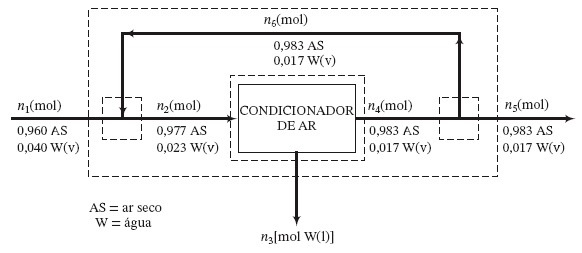

Fonte: FELDER *et al.* (2017), adaptado.

</center>

Dessa maneira, com a finalidade de resolver o problema, é necessário considerar:

\\

- As quantidades, em mol, dos componentes que entram e saem de cada etapa do sistema:
  - $n_1$, quantidade total de ar externo que entra no Ponto de Reciclo, onde será misturado com ar seco reciclado;

  - $n_2$, quantidade total de ar misturado que sai do Ponto de Reciclo e entra no Condicionador de Ar para ser refrigerado;

  - $n_3$, quantidade de água condensada que é descartada para o exterior pelo Condicionador de Ar;

  - $n_4$, quantidade total de ar refrigerado que sai do Condicionador e é distribuído entre o Cômodo e o Ponto de Reciclo;

  - $n_5 = 100$, quantidade total de ar que sai para o Cômodo e permanece para resfriá-lo;

  - $n_6$, quantidade total de ar que sai do Condicionador de Ar e segue para o Ponto de Reciclo, para ser reinserido no processo.

\\

- As quantidades relativas de ar e água para cada etapa do sistema:
  - $m_{11} = 96,0\%$ e $m_{21} = 4,0\%$, respectivamente, as composições de ar totalmente seco e de água que vêm do exterior e entram no sistema através do Ponto de Reciclo;

  - $m_{12} = 97,7\%$ e $m_{22} = 2,3\%$, respectivamente, as composições de ar e água que saem do Ponto de Reciclo, após a mistura das fontes externa e reciclada de ar, e entram no Condicionador de Ar;

  - $m_{13} = 0\%$ e $m_{23} = 100\%$, respectivamente, as composições representativas de ar e água que são descartadas pelo Condicionador de Ar para o exterior, onde somente água condensada é descartada;

  - $m_{14} = m_{15}$ e $m_{24} = m_{25}$, respectivamente, as composições (%) de ar e água que saem do Condicionador de Ar para serem direcionadas ao Cômodo ou ao reciclo, após o resfriamento do ar;

  - $m_{15} = 98,3\%$ e $m_{25} = 1,7\%$, respectivamente, as composições de ar e água que permanecem no Cômodo para resfriá-lo;

  - $m_{16} = m_{15}$ e $m_{26} = m_{25}$, respectivamente, as composições (%) de ar e água que, após saírem do Condicionador de Ar, são reciclados ao sistema, sendo reinseridos pelo Ponto de Reciclo.

\\

A partir das considerações anteriores, é possível equacionar:

- O Balanço de Massa Global:

  $\begin{cases}
  m_{11}n_1 = m_{13}n_3 + m_{15}n_5 \\
  m_{21}n_1 = m_{23}n_3 + m_{25}n_5
  \end{cases}$

  Rearranjado:

  $\begin{cases}
  m_{11}n_1 - m_{13}n_3 = m_{15}n_5 \\
  m_{21}n_1 - m_{23}n_3 = m_{25}n_5
  \end{cases}$

\\

- A Equação Matricial do Balanço de Massa Global:

  $\begin{pmatrix}
  m_{11} & m_{13} \\
  m_{21} & m_{23}
  \end{pmatrix}$
  $\cdot$
  $\begin{pmatrix}
  n_1 \\
  -n_3
  \end{pmatrix}$
  $=$
  $\begin{pmatrix}
  m_{15}n_5 \\
  m_{25}n_5
  \end{pmatrix}$

\\

- O Balanço de Massa no Ponto de Reciclagem:

  $\begin{cases}
  m_{12}n_2 = m_{11}n_1 + m_{16}n_6 \\
  m_{22}n_2 = m_{21}n_1 + m_{26}n_6
  \end{cases}$

  Rearranjado:

  $\begin{cases}
  m_{12}n_2 - m_{16}n_6 = m_{11}n_1 \\
  m_{22}n_2 - m_{26}n_6 = m_{21}n_1
  \end{cases}$

\\

- A Equação Matricial do Balanço de Massa no Ponto de Reciclagem:

  $\begin{pmatrix}
  m_{12} & m_{16} \\
  m_{22} & m_{26}
  \end{pmatrix}$
  $\cdot$
  $\begin{pmatrix}
  n_2 \\
  -n_6
  \end{pmatrix}$
  $=$
  $\begin{pmatrix}
  m_{11}n_1 \\
  m_{21}n_1
  \end{pmatrix}$

\\

- O Balanço de Massa no Condicionador de Ar:

  $\begin{cases}
  m_{12}n_2 = m_{13}n_3 + m_{14}n_4 \\
  m_{22}n_2 = m_{23}n_3 + m_{24}n_4
  \end{cases}$

\\

- O Balanço de Massa no Cômodo:

  $\begin{cases}
  m_{14}n_4 = m_{15}n_5 + m_{16}n_6 \\
  m_{24}n_4 = m_{25}n_5 + m_{26}n_6
  \end{cases}$

\\

- A relação existente entre as quantidades (mol) de ar no sistema, de acordo com as análises dos nós resultantes de bifurcações e misturas dos fluxos:

  $\begin{cases}
  n_2 = n_1 + n_6 \\
  n_2 = n_3 + n_4 \\
  n_4 = n_5 + n_6
  \end{cases}$

\\

Com base nas relações acima, é possível determinar as quantidades (mol) de ar seco e água que circulam em cada etapa do sistema ($n_1$, $n_2$, $n_3$, $n_4$ e $n_6$).

In [ ]:
########## EXEMPLO DO LIVRO DO FELDER ET AL. 2017 ##########

import numpy as np

#-------------------------------------------------------------------#
#|        Concentracao da corrente de saida do Comodo  (%)         |#
#-------------------------------------------------------------------#
m25 = 1.7 / 100
m15 = 1 - m25
# Quantidade de ar (mol) #
n5 = 100

#-------------------------------------------------------------------#
#|Concentracoes das correntes de entrada do Ponto de Reciclagem (%)|#
#-------------------------------------------------------------------#
# Do exterior #
m21 = 4 / 100
m11 = 1 - m21
# Do reciclo #
m26 = m25
m16 = 1 - m26

#-------------------------------------------------------------------#
#|  Concentracao da corrente de saida do Ponto de Reciclagem  (%)  |#
#-------------------------------------------------------------------#
m22 = 2.3 / 100
m12 = 1 - m22

#-------------------------------------------------------------------#
#| Concentracoes das correntes de saida do Condicionador de ar (%) |#
#-------------------------------------------------------------------#
# Para o comodo #
m24 = m25
m14 = 1 - m24
# Para o exterior #
m23 = 1
m13 = 1 - m23

#-------------------------------------------------------------------#
#|                           Incognitas                            |#
#-------------------------------------------------------------------#
# n1, n2, n3, n4, n6

#-------------------------------------------------------------------#
#|                     Balaco de massa global                      |#
#-------------------------------------------------------------------#
A1 = np.array([[m11, m13],
               [m21, m23]])

B1 = np.array([[n5*m15],
               [n5*m25]])
# Resolucao do sistema #
X1 = np.linalg.solve(A1, B1)
n1 =  X1[0][0]
n3 = -X1[1][0]

#-------------------------------------------------------------------#
#|             Balanco de massa no Ponto de Reciclagem             |#
#-------------------------------------------------------------------#

A2 = np.array([[m12, m16],
               [m22, m26]])

B2 = np.array([[n1*m11],
               [n1*m21]])
# Resolucao do sistema #
X2 = np.linalg.solve(A2, B2)
n2 =  X2[0][0]
n6 = -X2[1][0]


#-------------------------------------------------------------------#
#|                   Balanco de massa do Comodo                    |#
#-------------------------------------------------------------------#
n4 = n5 + n6

#-------------------------------------------------------------------#
#|                      Impressao da solucao                       |#
#-------------------------------------------------------------------#

def ImprimeArAgua (ar, agua):
  print("    Ar   = ", "%.2f"%ar, "mol")
  print("    Água = ", "%.2f"%agua, "mol")

print("-----------------------------------------------------")
print("---------------  PONTO DE RECICLAGEM  ---------------")
print("-----------------------------------------------------")

print("Entrada de ar externo, quente e úmido: ")
ImprimeArAgua (m11 * n1, m21 * n1)
print("Entrada de ar reciclado, frio e seco: ")
ImprimeArAgua (m16 * n6, m26 * n6)
print("Saída de ar para o condicionador: ")
ImprimeArAgua (m12 * n2, m22 * n2)
print("\n")

print("-----------------------------------------------------")
print("------------------  CONDICIONADOR  ------------------")
print("-----------------------------------------------------")

print("Entrada de ar do ponto de reciclagem: ")
ImprimeArAgua (m12 * n2, m22 * n2)
print("Saída de água para o exterior: ")
ImprimeArAgua (m13 * n3, m23 * n3)
print("Saída de ar frio e seco para o cômodo: ")
ImprimeArAgua (m14 * n4, m24 * n4)
print("\n")

print("-----------------------------------------------------")
print("---------------------  COMODO  ----------------------")
print("-----------------------------------------------------")

print("Entrada de ar frio e seco produzido pelo condicionador: ")
ImprimeArAgua (m14 * n4, m24 * n4)
print("Ar frio e seco que permanece e resfria o ambiente: ")
ImprimeArAgua (m16 * n6, m26 * n6)
print("Saída de ar que é reciclado para o sistema: ")
ImprimeArAgua (m15 * n5, m25 * n5)

-----------------------------------------------------
---------------  PONTO DE RECICLAGEM  ---------------
-----------------------------------------------------
Entrada de ar externo, quente e úmido: 
    Ar   =  98.30 mol
    Água =  4.10 mol
Entrada de ar reciclado, frio e seco: 
    Ar   =  285.19 mol
    Água =  4.93 mol
Saída de ar para o condicionador: 
    Ar   =  383.49 mol
    Água =  9.03 mol


-----------------------------------------------------
------------------  CONDICIONADOR  ------------------
-----------------------------------------------------
Entrada de ar do ponto de reciclagem: 
    Ar   =  383.49 mol
    Água =  9.03 mol
Saída de água para o exterior: 
    Ar   =  0.00 mol
    Água =  2.40 mol
Saída de ar frio e seco para o cômodo: 
    Ar   =  383.49 mol
    Água =  6.63 mol


-----------------------------------------------------
---------------------  COMODO  ----------------------
-----------------------------------------------------
Entrada de ar frio e sec